In [1]:
#import stuff that needed
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#knobs
BATCH_SIZE = 32
EPOCHS = 30
IMG_SIZE = (224, 224)
IMG_SHAPE = (224, 224, 3)

In [4]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/minihighq.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/minihighq'

In [6]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'binary',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'binary',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 489 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [8]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/30
15/15 [==============================] - 24s 607ms/step - loss: 0.8304 - accuracy: 0.5329 - val_loss: 0.6855 - val_accuracy: 0.5938
Epoch 2/30
15/15 [==============================] - 9s 603ms/step - loss: 0.6815 - accuracy: 0.5061 - val_loss: 0.6496 - val_accuracy: 0.6146
Epoch 3/30
15/15 [==============================] - 8s 595ms/step - loss: 0.5611 - accuracy: 0.6906 - val_loss: 0.5696 - val_accuracy: 0.6875
Epoch 4/30
15/15 [==============================] - 8s 592ms/step - loss: 0.4356 - accuracy: 0.7961 - val_loss: 0.7369 - val_accuracy: 0.6667
Epoch 5/30
15/15 [==============================] - 8s 597ms/step - loss: 0.5371 - accuracy: 0.7804 - val_loss: 0.5430 - val_accuracy: 0.7500
Epoch 6/30
15/15 [==============================] - 8s 597ms/step - loss: 0.4712 - accuracy: 0.7886 - val_loss: 0.5813 - val_accuracy: 0.7500
Epoch 7/30
15/15 [==============================] - 9s 603ms/step - loss: 0.3822 - accuracy: 0.8351 - val_loss: 0.4023 - val_accuracy: 0.8021
Epoch

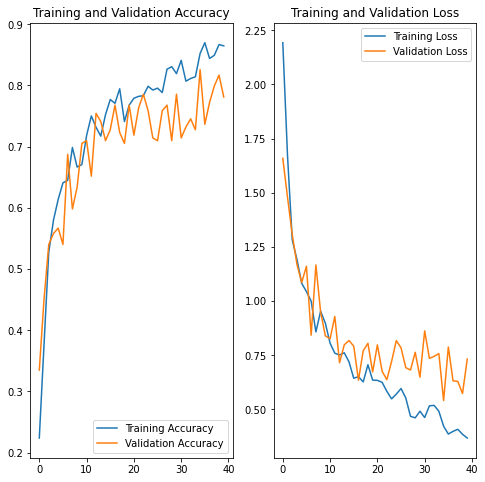

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving jer8.jpg to jer8 (2).jpg
jer8.jpg
Jeruk


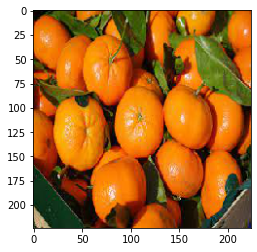

In [15]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('Appel')
  else:
    print('Jeruk')

In [16]:
export_dir = 'saved_model-fromscratch'

model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


In [17]:
!zip -r /content/saved_model-fromscratch.zip /content/saved_model-fromscratch

updating: content/saved_model-fromscratch/ (stored 0%)
updating: content/saved_model-fromscratch/assets/ (stored 0%)
updating: content/saved_model-fromscratch/keras_metadata.pb (deflated 86%)
updating: content/saved_model-fromscratch/saved_model.pb (deflated 89%)
updating: content/saved_model-fromscratch/variables/ (stored 0%)
updating: content/saved_model-fromscratch/variables/variables.data-00000-of-00001 (deflated 10%)
updating: content/saved_model-fromscratch/variables/variables.index (deflated 67%)


In [18]:
from google.colab import files
files.download("/content/saved_model-fromscratch.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>